In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Unemployment in India.csv")

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.sample(8)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
546,Karnataka,30-06-2020,Monthly,6.12,8822411.0,39.93,Urban
433,Chhattisgarh,30-11-2019,Monthly,8.32,2341284.0,46.59,Urban
522,Jharkhand,31-08-2019,Monthly,20.25,2335406.0,43.35,Urban
48,Chhattisgarh,31-01-2020,Monthly,9.89,6236201.0,42.03,Rural
616,Puducherry,31-05-2019,Monthly,1.25,283905.0,35.71,Urban
485,Haryana,30-09-2019,Monthly,26.84,2675862.0,43.70,Urban
704,Tripura,30-11-2019,Monthly,27.15,427700.0,62.14,Urban


In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.shape

(768, 7)

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
df_MOD = df.dropna()

In [12]:
df.shape

(768, 7)

Text(0.5, 1.0, 'Percentage of Missing Values in Each Column')

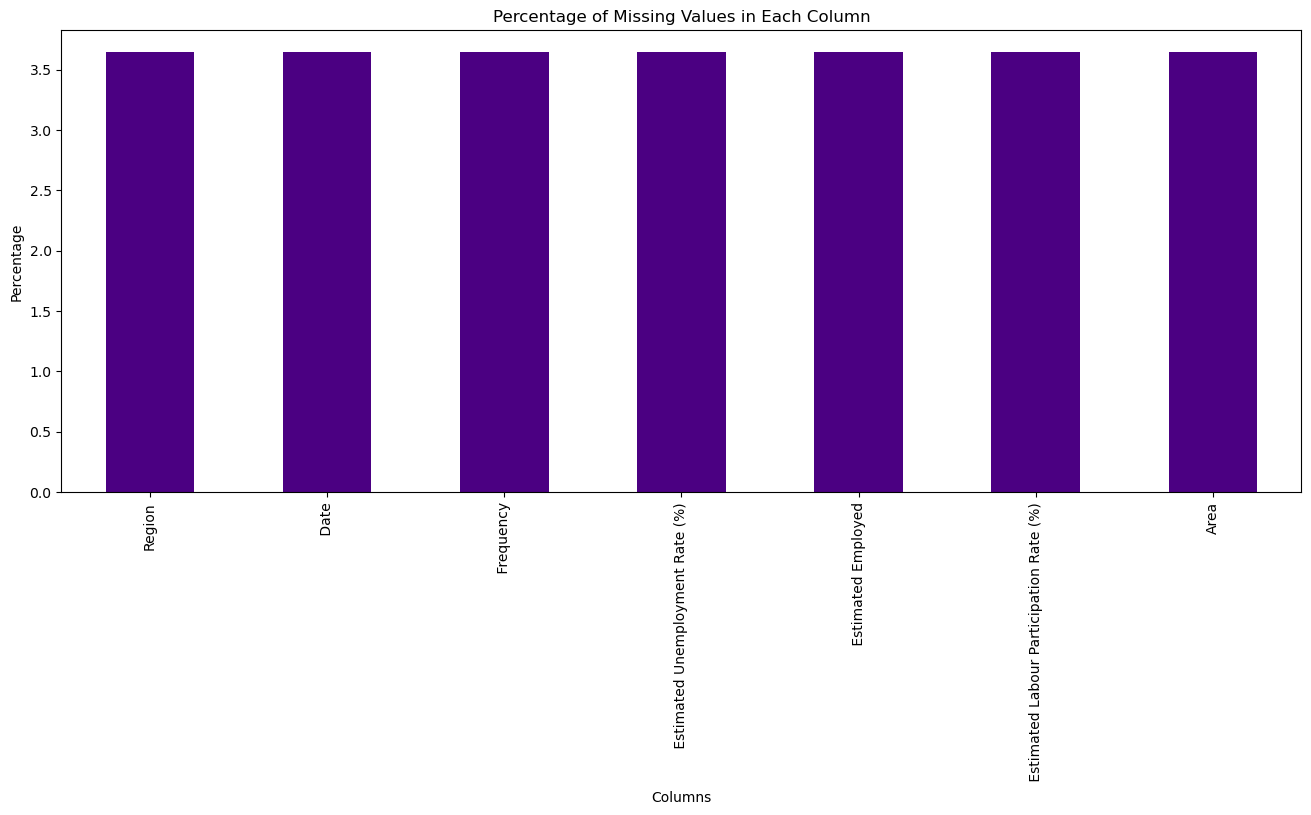

In [13]:
plt.figure(figsize=(16, 6))

missing_per = df.isnull().sum() / len(df) * 100

missing_per.plot(kind='bar', color='indigo')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')



In [14]:
df_MOD.shape

(740, 7)

In [15]:
df_MOD.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [16]:
# use groupby function to find the trend of Rating in each Installs_category
avg_state = df_MOD.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("Average Unemployment Rate by State:\n", avg_state)

Average Unemployment Rate by State:
 Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64


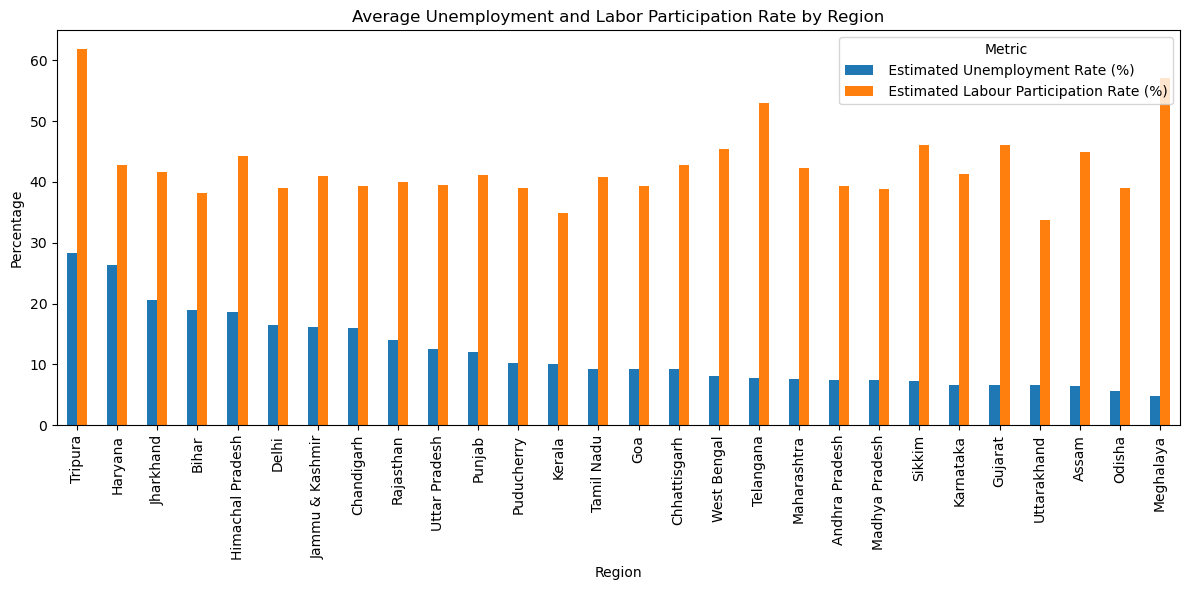

In [17]:
avg_state = df_MOD.groupby('Region')[[' Estimated Unemployment Rate (%)', 
                                        ' Estimated Labour Participation Rate (%)']].mean()

# Sort by unemployment rate
avg_state = avg_state.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False)

# Plot both columns together
avg_state.plot(kind="bar", figsize=(12,6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

/var/folders/ql/n6678gc15ml7swlh0pyxqvhr0000gn/T/ipykernel_1998/3530749183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y=" Estimated Labour Participation Rate (%)", data=df_MOD, palette="Spectral")


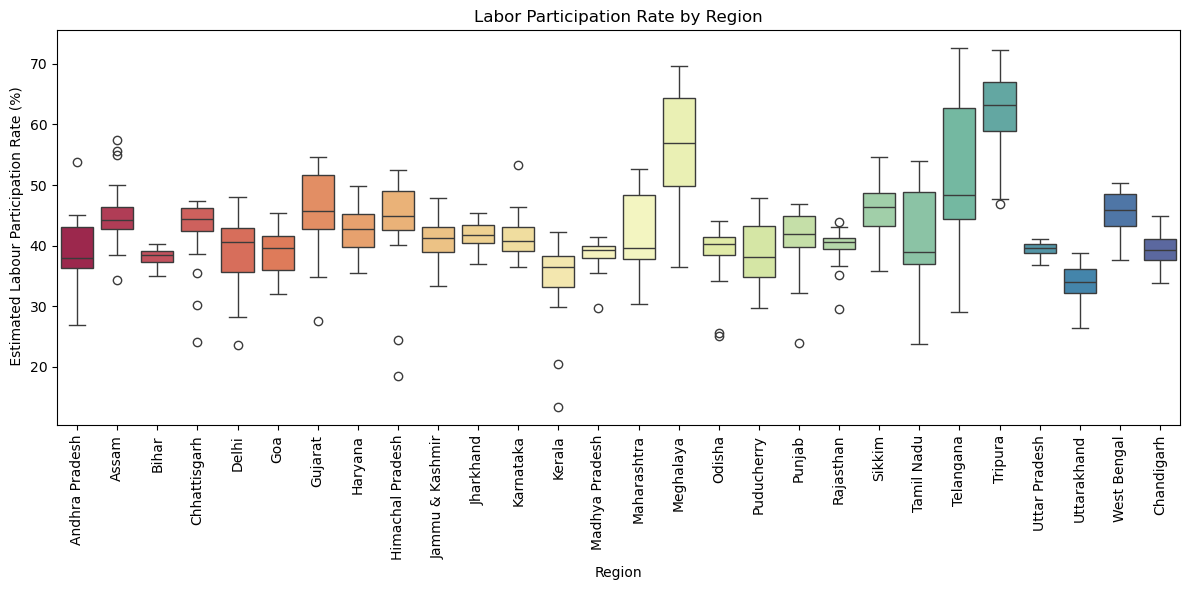

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y=" Estimated Labour Participation Rate (%)", data=df_MOD, palette="Spectral")
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()